In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\data\sample_sales_data.csv")
data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [3]:
# Checking for null values 
data.isnull().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [4]:
# Checking for duplicate values
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [6]:
#Droping unnamed column
data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [8]:
data['transaction_id'].value_counts()

transaction_id
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: count, Length: 7829, dtype: int64

In [9]:
# Tranforming timestamp column to date time 

data['timestamp'] = pd.to_datetime(data['timestamp'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [12]:
data['category'].nunique()

22

In [13]:
data['category'].value_counts()

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64

In [14]:
data['customer_type'].value_counts()

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64

<Axes: >

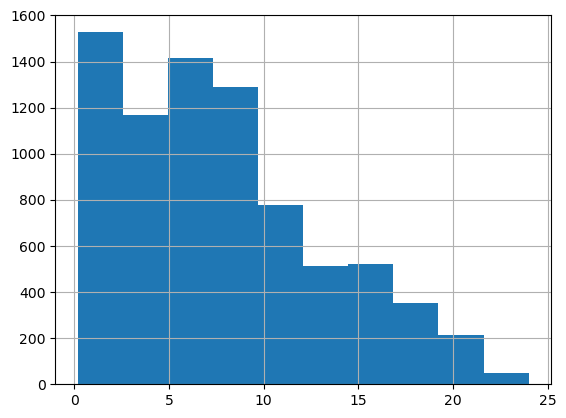

In [15]:
data['unit_price'].hist()  ## There is a skweness in unit price data.

<Axes: >

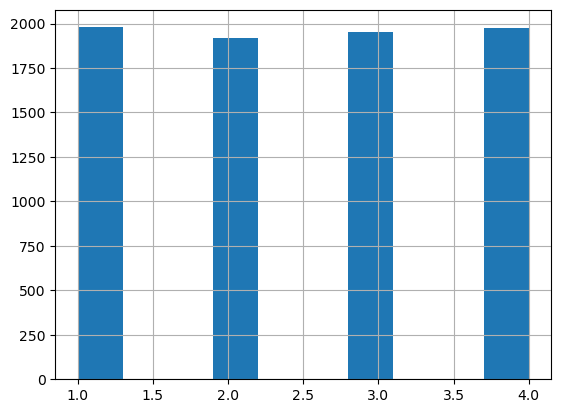

In [17]:
data['quantity'].hist()

In [18]:
data['quantity'].value_counts()

quantity
1    1979
4    1976
3    1954
2    1920
Name: count, dtype: int64

<Axes: >

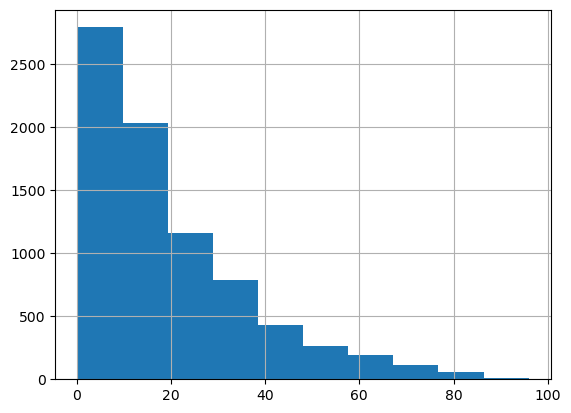

In [19]:
data['total'].hist()

* Again we can see right skweness in the total column.

In [27]:
quantity_sold = data.groupby('category')['quantity'].sum().sort_values(ascending=False)
quantity_sold

category
fruit                    2439
vegetables               2124
packaged foods           1280
baked goods              1089
canned foods             1082
refrigerated items       1065
kitchen                   955
dairy                     950
meat                      939
cheese                    783
beverages                 776
cleaning products         725
seafood                   669
frozen                    660
snacks                    652
baking                    648
medicine                  602
baby products             543
personal care             455
condiments and sauces     450
pets                      395
spices and herbs          304
Name: quantity, dtype: int64

* fruits, vegetables, pacakaged foods, baked goods, canned foods are the top selling categories where stock re-fulling must be done quickly.

In [28]:
data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [29]:
data['timestamp'].tail()

7824   2022-03-03 18:22:09
7825   2022-03-04 19:14:46
7826   2022-03-03 14:00:09
7827   2022-03-04 15:11:38
7828   2022-03-06 13:50:36
Name: timestamp, dtype: datetime64[ns]

In [35]:
data['payment_type'].value_counts()

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64

In [36]:
cat_cols = data[['category','customer_type','payment_type']]
num_cols = data[['unit_price','quantity','total']]

In [37]:
cat_cols.describe()

,category,customer_type,payment_type
count,7829,7829,7829
unique,22,5,4
top,fruit,non-member,cash
freq,998,1601,2027


* Most customers pefer cash payments for products.

In [38]:
num_cols.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


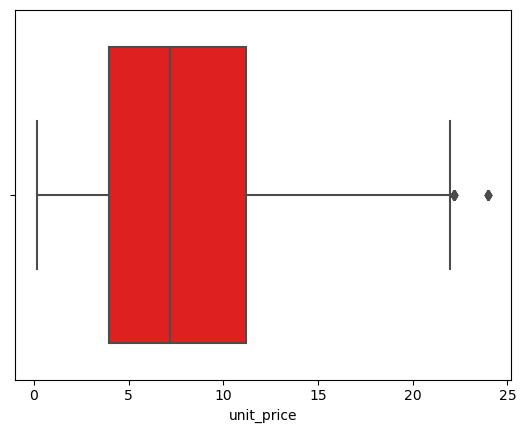

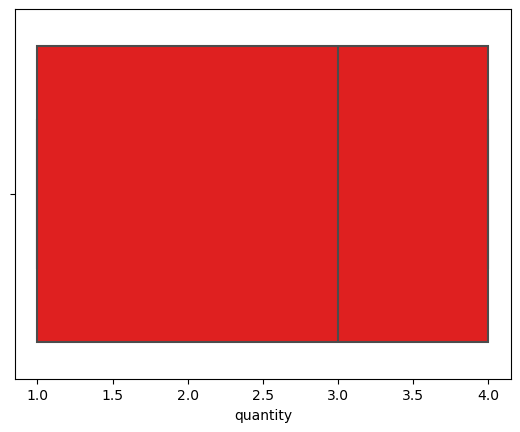

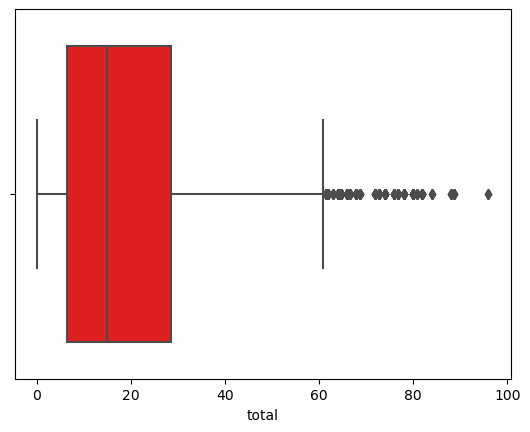

In [43]:
## Checking for outliers

for col in num_cols:
    sns.boxplot(data=data,x=col,color='red')
    plt.xlabel(col)
    plt.show()

#### Chi-Square test between category and quantity sold
     

     * From the chi-square test we can find out the association between two Categorical variable

     * Null Hypothses : There is no realtionship between category and quantity sold

     * Alternative Hypothses: There is a significant realtionship between category and quanitity sold.

In [45]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['category'], data['quantity'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square test between category and quantity sold: ")
print(f"   \nChi-Square Statistic: {chi2_stat}")
print(f"    P-value: {p_value}")
print(f"    Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


if p_value<0.05:
    print("\nSince the p-value is less than 0.05,we will reject the null hypothesis")
else:
    print("\nSince the p-value is more than 0.05,we fail to reject the null hypothesis")

Chi-Square test between category and quantity sold: 
   
Chi-Square Statistic: 46.05024310936669
    P-value: 0.9463885074380785
    Degrees of Freedom: 63
Expected Frequencies Table:
quantity                        1           2           3           4
category                                                             
baby products           56.622302   54.934219   55.907012   56.536467
baked goods            111.980713  108.642228  110.566100  111.810959
baking                  66.733427   64.743901   65.890407   66.632265
beverages               76.086218   73.817857   75.125048   75.970878
canned foods           108.947375  105.699323  107.571082  108.782220
cheese                  74.063993   71.855920   73.128369   73.951718
cleaning products       73.811215   71.610678   72.878784   73.699323
condiments and sauces   45.752842   44.388811   45.174863   45.683484
dairy                   94.791800   91.965768   93.594329   94.648103
frozen                  66.480649   64.498659 

* We conclude that there is no relationship between category of goods and quantity sold.

In [46]:
#### Correlation

num_cols.corr()

,unit_price,quantity,total
unit_price,1.000000,0.024588,0.792018
quantity,0.024588,1.000000,0.521926
total,0.792018,0.521926,1.000000
